## Data Analysis

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
path = '/home/mas-19/Documents/Thesis/src/input_st-gcn/lameness/'
train_path = path + 'lameness_train/'
test_path = path + 'lameness_test/'

label_table = pd.read_csv('/home/mas-19/Documents/Thesis/src/annotation/data_labels.csv')


In [85]:
# Util functions
def tag_loc(tag):
    return (tag + 1) if tag != 14 else 8

def classify(score):
    if score < 2:
        label_index = 1
    elif score >= 2 and score < 3:
        label_index = 2
    elif score >= 3 and score < 4:
        label_index = 3
    elif score >= 4:
        label_index = 4
   
    return label_index

def count_file_labels(datapath):
    class_labels = np.zeros((1, 4))
    for file in os.listdir(datapath):
        filename = file.split('.')[0]
        cow_id = filename.split('-')[0]
        tag = filename.split('-')[1]
        label = label_table[(label_table['cow_id'] == cow_id)].iloc[0, tag_loc(int(tag))]
        class_label = classify(label) - 1
        class_labels[0, class_label] += 1 
        
    return class_labels

def count_labels(pklfile):
    class_labels = np.zeros((1, 4))
    labels = np.load(pklfile)[1]
    for i in labels:
        class_labels[0, i] += 1

    return class_labels


In [83]:
pklfile = '/media/mas-19/13E3-03F2/computer/Documents/tools/st-gcn/data/Lameness/lameness-skeleton/test_label.pkl' 
count_labels(pklfile)

[3, 1, 0, 2, 3, 3, 0, 0, 2, 1, 1, 0, 1, 0, 1, 3, 0, 1, 0, 3, 0, 1, 3, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 3, 2, 1, 0, 2, 2, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 3, 0, 0, 1, 2, 0, 0, 0, 3, 1, 3, 2, 1, 0, 2, 3, 0, 1, 1]


array([[64., 41., 29., 17.]])

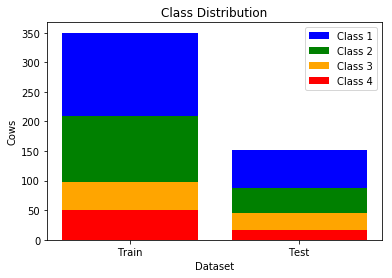

In [96]:
# Bar chart (source: http://benalexkeen.com/bar-charts-in-matplotlib/)
train_pkl = '/media/mas-19/13E3-03F2/computer/Documents/tools/st-gcn/data/Lameness/lameness-skeleton/train_label.pkl' 
test_pkl = '/media/mas-19/13E3-03F2/computer/Documents/tools/st-gcn/data/Lameness/lameness-skeleton/test_label.pkl' 
train_labels = count_labels(train_pkl)
test_labels = count_labels(test_pkl)

sets = ['Train', 'Test']
class1 = np.array([train_labels[0,0], test_labels[0,0]])
class2 = np.array([train_labels[0,1], test_labels[0,1]])
class3 = np.array([train_labels[0,2], test_labels[0,2]])
class4 = np.array([train_labels[0,3], test_labels[0,3]])

ind = [x for x, _ in enumerate(sets)]

plt.bar(ind, class1, width=0.8, label='Class 1', color='blue', bottom=class2+class3+class4)
plt.bar(ind, class2, width=0.8, label='Class 2', color='green', bottom=class3+class4)
plt.bar(ind, class3, width=0.8, label='Class 3', color='orange', bottom=class4)
plt.bar(ind, class4, width=0.8, label='Class 4', color='red')

plt.xticks(ind, sets)
plt.ylabel("Cows")
plt.xlabel("Dataset")
plt.legend(loc="upper right")
plt.title("Class Distribution")

plt.show()

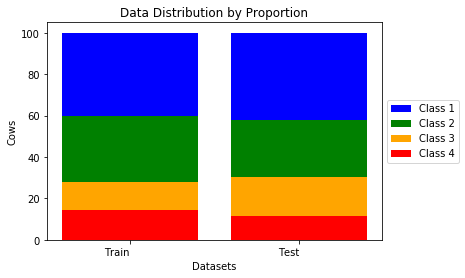

In [94]:
total = class1 + class2 + class3 + class4
class1_perc = (class1 / total) * 100
class2_perc = (class2 / total) * 100
class3_perc = (class3 / total) * 100
class4_perc = (class4 / total) * 100

plt.bar(ind, class1_perc, width=0.8, label='Class 1', color='blue', bottom=class2_perc+class3_perc+class4_perc)
plt.bar(ind, class2_perc, width=0.8, label='Class 2', color='green', bottom=class3_perc+class4_perc)
plt.bar(ind, class3_perc, width=0.8, label='Class 3', color='orange', bottom=class4_perc)
plt.bar(ind, class4_perc, width=0.8, label='Class 4', color='red')

plt.xticks(ind, sets)
plt.ylabel("Cows")
plt.xlabel("Datasets")
plt.title("Data Distribution by Proportion")
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), horizontalalignment='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

## Functions

In [21]:
def accuracy(confusion_matrix):
    return (cm.trace() / cm.sum())

def precision(confusion_matrix):
    return (cm.diagonal() / np.sum(cm, axis=0))

def recall(confusion_matrix):
    return (cm.diagonal() / np.sum(cm, axis=1))
    

## Confusion matrix for st-gcn results

In [5]:
y_true = [3, 1, 0, 2, 3, 3, 0, 0, 2, 1, 1, 0, 1, 0, 1, 3, 0, 1, 0, 3, 0, 1, 3, 1, 2, 0, 1, 0, 0, 2, 
          1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 3, 0, 1, 2, 3, 0, 0, 
          2, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 3, 2, 1, 0, 2, 2, 2, 0, 3, 0, 0, 
          1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 
          1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 3, 0, 0, 1, 2, 0, 0, 0, 3, 1, 3, 2, 1, 0, 2, 3, 0, 1, 1]

y_pred = [2, 1, 0, 0, 2, 3, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 
          2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 
          1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 
          1, 0, 0, 1, 1, 0, 1, 0, 3, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 
          2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 3, 0, 1, 2, 3, 0, 0, 0, 3, 1, 1, 2, 1, 2, 1, 3, 1, 0, 0]

In [9]:
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
print(cm, type(cm))
'''
   ------ predicted -----
   |
   actual
   |
'''

[[33 24  6  1]
 [ 8 24  9  0]
 [ 8  6 13  2]
 [ 3  1  8  5]] <class 'numpy.ndarray'>


In [30]:
print("accuracy: ", accuracy(cm))
print()
print("label precision recall")
for label in range(4):
    print("{0:5d} {1:9.3f} {2:6.3f}".format(label, precision(cm)[label], recall(cm)[label]))

accuracy:  0.4966887417218543

label precision recall
    0     0.635  0.516
    1     0.436  0.585
    2     0.361  0.448
    3     0.625  0.294


In [29]:
print("{0:2d} {1:3.2f}".format(1,2.1234))

 1 2.12


In [16]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

precision(0, cm)

0.6346153846153846